3개년(2019,2020,2021)의 질병관리본부의 국민건강영양조사데이터를 활용하여 코로나 기간의 노인 고독사의 비율과 수면시간 우울 및 자살 생각의 관계를 살펴보았다. 
1) 일반적인 특성, 수면시간, 우울 및 자살 생각의 빈도와 퍼센트를 알기위한 복합 표본 빈도분석 진행 
2) 일반적인 특성 및 수면시간에 따른 우울과 자살 생각의 차이를 알기위한 복합 표본 교차 분석 진행 
3) 수면 시간과 우울 및 자살 생각의 관계를 알기위한 다중 로지스틱 회귀분석 진행 예정 

https://blog.naver.com/PostView.naver?blogId=haley2203&logNo=222978602976&parentCategoryNo=&categoryNo=49&viewDate=&isShowPopularPosts=true&from=search

(1) explore data

- 성별 sex : 남/여

- 연령 age : 65-69세/70-79세/80세 이상

- 결혼상태 marri_1 : 기혼/미혼

- 교육 edu : 초졸/중졸/고졸/대졸 이상

- 가구소득 ho_incm : 하/중하/중상/상

- 세대 유형(1인/다인) genertn : 1세대 1인가구(1인가구)/다인가구

- 음주(비음주/음주) BD1 : 술 마셔본적 없음(비음주)/있음(음주)

- 흡연(흡연/비흡연) BS1_1 : 5갑 미만, 이상(흡연)/피운적없음(비흡연) 

- 신체활동(유산소신체활동 실천율) pa_aerobic : 실천함/실천하지 않음

- 주관적 건강인지(나쁨/보통/좋음) D_1_1 : 매우나쁨, 나쁨(나쁨)/보통/좋음, 매우좋음(좋음)

 

(2) 수면시간(주중 하루평균수면시간) BP16_1

- 5시간 미만/5시간 이상 7시간 미만/7시간 이상 9시간 미만/9시간 이상

 

(3) 수면시간(주말 하루평균수면시간) BP16_2

 

(3) 우울 BP5

- 최근 1년 동안 연속적으로 2주 이상 일상생활에 지장이 있을 정도로 슬프거나 절망감을

느낀 적이 있습니까? 예(우울 있음)/아니오(우울 없음)

 

(4) 자살생각 BP6_10

- 최근 1년 동안 심각하게 자살을 생각한 적이 있습니까? 

예(자살 생각 있음)/아니오(자살 생각 없음)

# load data

In [5]:
import pandas as pd
import pyreadstat

In [2]:
# SPSS 파일 경로들
spss_file_paths = ["C:/Users/shj06/OneDrive/바탕 화면/비즈니스통계응용/HN19_ALL.sav",
                   "C:/Users/shj06/OneDrive/바탕 화면/비즈니스통계응용/HN20_ALL.sav",
                   "C:/Users/shj06/OneDrive/바탕 화면/비즈니스통계응용/HN21_ALL.sav"]
# 빈 DataFrame 생성
merged_df = pd.DataFrame()

In [3]:
# 각 SPSS 파일을 순회하며 데이터 합치기
for file_path in spss_file_paths:
    # SPSS 파일 불러오기
    data, meta = pyreadstat.read_sav(file_path)

    # 데이터프레임 생성
    df = pd.DataFrame(data)

    # 데이터 합치기
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# CSV 파일로 저장
# merged_df.to_csv('project_for_bs.csv', index=False)

In [6]:
df =  pd.read_csv("C:/Users/shj06/OneDrive/바탕 화면/비즈니스통계응용/project_for_bs.csv")

C:\Users\shj06\AppData\Local\Temp\ipykernel_27272\3605132880.py:1: DtypeWarning: Columns (111,141,209,218,225,251,279,312,333,349,403,422,460,526,536,548,568,621,638,711,713,715,826,827,896,912,914,930,959) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv("C:/Users/shj06/OneDrive/바탕 화면/비즈니스통계응용/project_for_bs.csv")


In [7]:
df.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
0,2023.07.11.,A751215301,A7512153,2019.0,1.0,1.0,1.0,A751,1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.07.11.,A751215303,A7512153,2019.0,1.0,1.0,1.0,A751,1.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023.07.11.,A751220401,A7512204,2019.0,1.0,1.0,1.0,A751,1.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023.07.11.,A751220402,A7512204,2019.0,1.0,1.0,1.0,A751,2.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.07.11.,A751220403,A7512204,2019.0,1.0,1.0,1.0,A751,1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data preprocessing

In [8]:
# Creating age_domain based on age
df['age_domain'] = df['age'].apply(lambda x: 1 if x > 64 else 0)

In [9]:
# Creating age_g based on age
def create_age_g(age):
    if age >= 80:
        return "80세 이상"
    elif age >= 70:
        return "70-79"
    elif age >= 65:
        return "65-69"
    else:
        return ""

df['age_g'] = df['age'].apply(create_age_g)

In [10]:
# Creating marry based on marri_1
df['marry'] = df['marri_1'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else None))

In [11]:
# Creating genertn_g based on genertn
def create_genertn_g(genertn):
    if genertn == 1:
        return 1
    elif 2 <= genertn <= 7:
        return 2
    else:
        return None

df['genertn_g'] = df['genertn'].apply(create_genertn_g)

In [12]:
# Creating drink based on BD1
df['drink'] = df['BD1'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else None))

In [13]:
# Creating smoke based on BS1_1
df['smoke'] = df['BS1_1'].apply(lambda x: 1 if x in [1, 2] else (2 if x == 3 else None))

In [14]:
# Creating se_body based on D_1_1
def create_se_body(D_1_1):
    if D_1_1 <= 2:
        return 0
    elif D_1_1 == 3:
        return 1
    elif D_1_1 in (4, 5):
        return 2
    else:
        return None

df['se_body'] = df['D_1_1'].apply(create_se_body)

In [15]:
# Creating wday_sleep based on BP16_1
def create_wday_sleep(BP16_1):
    if 9 <= BP16_1 <= 13:
        return 4
    elif BP16_1 >= 7:
        return 3
    elif BP16_1 >= 5:
        return 2
    elif BP16_1 < 5:
        return 1
    else:
        return None

df['wday_sleep'] = df['BP16_1'].apply(create_wday_sleep)

In [16]:
# Creating wend_sleep based on BP16_2
def create_wend_sleep(BP16_2):
    if 9 <= BP16_2 <= 13:
        return 4
    elif BP16_2 >= 7:
        return 3
    elif BP16_2 >= 5:
        return 2
    elif BP16_2 < 5:
        return 1
    else:
        return None

df['wend_sleep'] = df['BP16_2'].apply(create_wend_sleep)

In [17]:
# Creating depress based on BP5
df['depress'] = df['BP5'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else None))

In [18]:
# Creating suicide based on BP6_10
df['suicide'] = df['BP6_10'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else None))

In [19]:
# Keeping selected columns
desired_columns = ['kstrata', 'wt_itvex', 'age_domain', 'sex', 'age_g', 'marry', 'edu', 'ho_incm',
                   'genertn_g', 'drink', 'smoke', 'pa_aerobic', 'se_body', 'wday_sleep', 'wend_sleep',
                   'depress', 'suicide']

df = df[desired_columns].copy()

In [20]:
# Display the resulting DataFrame
print(df)

       kstrata      wt_itvex  age_domain  sex age_g  marry  edu  ho_incm  \
0        913.0   4701.714124           0  1.0          1.0  2.0      2.0   
1        913.0   8827.818772           0  1.0          2.0  4.0      2.0   
2        913.0   5511.539481           0  1.0          1.0  3.0      1.0   
3        913.0   2992.038760           0  2.0          1.0  3.0      1.0   
4        913.0           NaN           0  1.0          2.0  NaN      1.0   
...        ...           ...         ...  ...   ...    ...  ...      ...   
22554    908.0  11325.360951           0  1.0          2.0  4.0      2.0   
22555    908.0   2280.873862           0  1.0          1.0  4.0      3.0   
22556    908.0   1128.160569           0  2.0          1.0  4.0      3.0   
22557    908.0    984.137178           0  1.0          2.0  1.0      3.0   
22558    908.0    984.137178           0  1.0          2.0  1.0      3.0   

       genertn_g  drink  smoke  pa_aerobic  se_body  wday_sleep  wend_sleep  \
0       

In [21]:
# frequency analysis

#### 범주형 자료 간의 관계를 분석하거나 독립성을 확인하기 위해 카이제곱 분포를 활용 
#### 또한, 카이제곱 검정은 관칙된 빈도와 기대 빈도간의 차이를 사용하여 변수 간의 독립성을 평가함. 

> 수면 시간과 우울감의 관계를 분석하고자 함. 두 변수 모두 범주형 자료 이므로 가이제곱 검정이 적합한 통계법이라 판단함 
> 각 변수는여러 범주(수면시간의 경우 4개의 범주, 우울감의 경우 2개의 범주) 로 나뉘어져있음

In [22]:
from scipy.stats import chi2_contingency

In [23]:
# 데이터 프레임 df에 변수 var에 대한 서베이 빈도표 생성
def survey_freq(data, var):
    crosstab = pd.crosstab(data['age_domain'], data[var])
    return crosstab

# 카이제곱 검정 수행
def chi_square_test(data, var):
    crosstab = pd.crosstab(data['age_domain'], data[var])
    chi2, p_val, dof, expected = chi2_contingency(crosstab)
    return chi2, p_val

In [24]:
# 사용 예시
# df는 데이터를 담고 있는 데이터 프레임으로 가정합니다
# 실제 데이터 프레임 이름이 다르다면 해당 이름으로 변경해주세요

# 'sex'에 대한 서베이 빈도표
sex_freq = survey_freq(df, 'sex')
print("Survey Frequency for sex:\n", sex_freq)

# 'sex'에 대한 카이제곱 검정
chi2_val, p_value = chi_square_test(df, 'sex')
print("Chi-Square Test for sex - Chi2 Value:", chi2_val, "p-value:", p_value)

# wday_sleep 변수에 대한 서베이 빈도표
wday_sleep_freq = survey_freq(df, 'wday_sleep')
print("wday_sleep에 대한 서베이 빈도표:\n", wday_sleep_freq)

# wend_sleep 변수에 대한 서베이 빈도표
wend_sleep_freq = survey_freq(df, 'wend_sleep')
print("wend_sleep에 대한 서베이 빈도표:\n", wend_sleep_freq)

# wday_sleep 변수에 대한 카이제곱 검정
chi2_val_wday_sleep, p_value_wday_sleep = chi_square_test(df, 'wday_sleep')
print("wday_sleep에 대한 카이제곱 검정 - Chi2 값:", chi2_val_wday_sleep, "p-값:", p_value_wday_sleep)

# wend_sleep 변수에 대한 카이제곱 검정
chi2_val_wend_sleep, p_value_wend_sleep = chi_square_test(df, 'wend_sleep')
print("wend_sleep에 대한 카이제곱 검정 - Chi2 값:", chi2_val_wend_sleep, "p-값:", p_value_wend_sleep)

# wday_sleep 변수에 대한 카이제곱 검정 (자살 생각과의 관계)
chi2_val_wday_sleep_s, p_value_wday_sleep_s = chi_square_test(df, 'wday_sleep')
print("wday_sleep에 대한 카이제곱 검정 (자살 생각과의 관계) - Chi2 값:", chi2_val_wday_sleep_s, "p-값:", p_value_wday_sleep_s)

# wend_sleep 변수에 대한 카이제곱 검정 (자살 생각과의 관계)
chi2_val_wend_sleep_s, p_value_wend_sleep_s = chi_square_test(df, 'wend_sleep')
print("wend_sleep에 대한 카이제곱 검정 (자살 생각과의 관계) - Chi2 값:", chi2_val_wend_sleep_s, "p-값:", p_value_wend_sleep_s)

Survey Frequency for sex:
 sex          1.0   2.0
age_domain            
0           8085  9189
1           2269  3016
Chi-Square Test for sex - Chi2 Value: 24.272825044581978 p-value: 8.361037651493072e-07
wday_sleep에 대한 서베이 빈도표:
 wday_sleep  1.0   2.0   3.0  4.0
age_domain                      
0           347  3721  6413  951
1           311  1119  1252  688
wend_sleep에 대한 서베이 빈도표:
 wend_sleep  1.0   2.0   3.0   4.0
age_domain                       
0           237  2060  6359  2776
1           296  1067  1277   730
wday_sleep에 대한 카이제곱 검정 - Chi2 값: 749.2768645249201 p-값: 4.3294810670680245e-162
wend_sleep에 대한 카이제곱 검정 - Chi2 값: 720.9294164115622 p-값: 6.076505577866284e-156
wday_sleep에 대한 카이제곱 검정 (자살 생각과의 관계) - Chi2 값: 749.2768645249201 p-값: 4.3294810670680245e-162
wend_sleep에 대한 카이제곱 검정 (자살 생각과의 관계) - Chi2 값: 720.9294164115622 p-값: 6.076505577866284e-156


> 1. 성별과 수면 시간에 따른 우울감: 
 성별에 따른 서베이 결과에서 카이제곱 검정 결과, 성별과우울감 간에 유의미한 관게가 있음을 나타낸다. (p-value: 8.361e-07)
> 2. 주중 수면 시간과 우울감: 
주중 수면시간( wday_sleep_에 따른 서베이 결과와 카이제곱 검정 결과, 주중 수면시간과 우울감 간에 매우 강력한 음의 상관관계가 있음을 확인.(p-value:4.329e-162). 즉, 주중 수면 시간이 증가할 수록 우울감이 감소하는 경향있는 것 확인 
> 3. 주말 수면 시간과 우울감: 
주말 수면시간(wend_sleep)에 따른 서베이 결과와 카이제곱 검정 결과, 주말 수면시간과 우울감 간에 위의 같은 강력한 음의 상관관계 확인. (p-value: 6.076e-156) 
즉, 주말 수면 시간이 증가할수록 우울감이 감소하는 경향이 있는 것 확인  

----> 주중 및 주말 수면시간이 높을수록 우울감이 감소한다. 따라서 노인들의 적절한 수면 시간 관리가 우울감 감소에 도움이 될 수 있다.

In [ ]:
# multiple logistics regression 

#다중 회귀 분석을 사용한 이유: 
수면 시간과 자살 생각 간의 관계를 탐구하고, 이 관계를 일반적인 특성들을 통제하며 분석하길 원함 

> 여러 독립 변수 들이 종속 변수에 미치는 영향을 동시에 고려하여 분석함 
수면 시간(wday_sleep, wend_sleep)을 독립변수로 설정하고, 자살생각(suicide)를 종속 변수로 설정하여 두 변수간의 관계를 파악함 

> 그러나 단순히 수면시간과 자살생각간의 관계만을 알아보는 것이 아니라, 일반적인 특성(성별,연령대,교육수준)을 고려하여 그 특성들이 어떠한 영향을 미치는 지를 알기위해서 전처리 과정에서 추가해줌. 이렇게 함으로서 일반적인 특성들이 수면시간과 자살생각간의 관계에 어떠한 영향을 미치는지 고려할수 있었음

In [25]:
import statsmodels.api as sm

# 데이터 로드 (hn19 데이터를 미리 로드했다고 가정)
# 데이터프레임 df를 사용하여 다음 코드 실행
# df = pd.read_csv('hn19.csv')

# 수면시간 변수 설정
df['wday_sleep'] = df['wday_sleep'].astype('category')
df['wend_sleep'] = df['wend_sleep'].astype('category')

# 다중로지스틱회귀분석 (수면시간과 자살 생각의 관계, 통제: 일반적 특성)
model = sm.MNLogit.from_formula("depress ~ wday_sleep + wend_sleep + sex + age_g + marry + edu + ho_incm + genertn_g + drink + smoke + pa_aerobic + se_body", df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318906
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                depress   No. Observations:                 5877
Model:                        MNLogit   Df Residuals:                     5858
Method:                           MLE   Df Model:                           18
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                 0.05975
Time:                        16:20:45   Log-Likelihood:                -1874.2
converged:                       True   LL-Null:                       -1993.3
Covariance Type:            nonrobust   LLR p-value:                 2.033e-40
        depress=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0629      0.505      4.082      0.000       1.072       3.054
wday_sle

종속변수가 범주형인 depress로서 우울여부를 나타냄 

각 독립변수의 계수(coef)와 표준오차(stderr),z값, p-value>> 독립변수들이 종속변수에 미치는 영향의 킈기와 통계적 유의성 확인하는 것들 

>예를들어, wday_sleep[T.2.0]변수의 계수는 0.2515: 이것은 수면시간이 2인 경우 (depressive sleep)의 logit(odds ratio)가 0.2515만큼 증가한다는 의미 
그러나 p-value가 0.412이므로 해당 변수는 유의하지 않음 

> 종합하여 보았을때 독립변수들이 우울 여부에 미치는 영향을 종합적으로 해석할수 있으며, p-value값의 유의 수준에 (0.05보다) 작은 변수들은 독립변수와 종속 변수에 유의미한 영향을 미치는 것으로 해석 가능함

In [ ]:
#plotting 몇개하고 언제 어떻게 쓰였는지 정리해서 프로젝트 마무리 하면될듯..시바 

<Figure size 1000x600 with 0 Axes>

C:\Users\shj06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shj06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shj06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


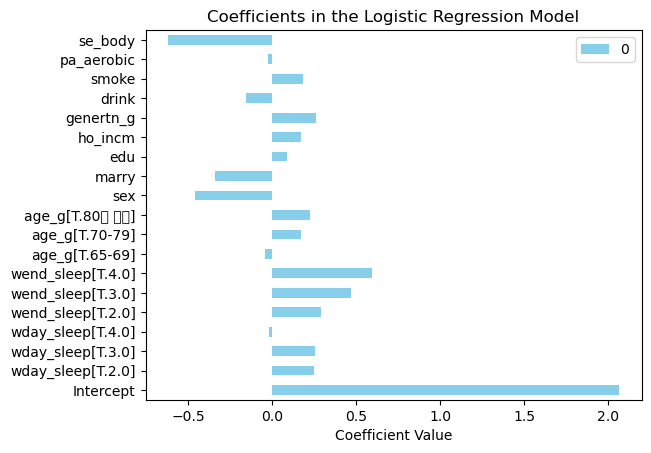

<Figure size 1000x600 with 0 Axes>

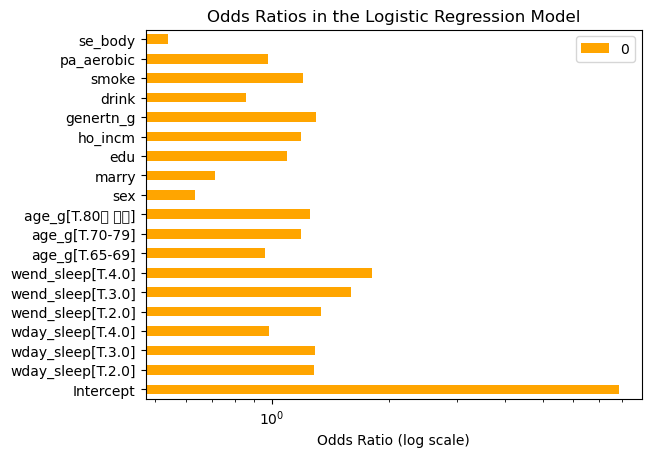

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients and odds ratios
coef_df = result.params  # Coefficients
odds_ratios = np.exp(coef_df)  # Odds ratios

# Plot coefficients
plt.figure(figsize=(10, 6))
coef_df.plot(kind='barh', color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients in the Logistic Regression Model')

# Plot odds ratios
plt.figure(figsize=(10, 6))
odds_ratios.plot(kind='barh', color='orange')
plt.xlabel('Odds Ratio (log scale)')
plt.xscale('log')
plt.title('Odds Ratios in the Logistic Regression Model')

plt.show()

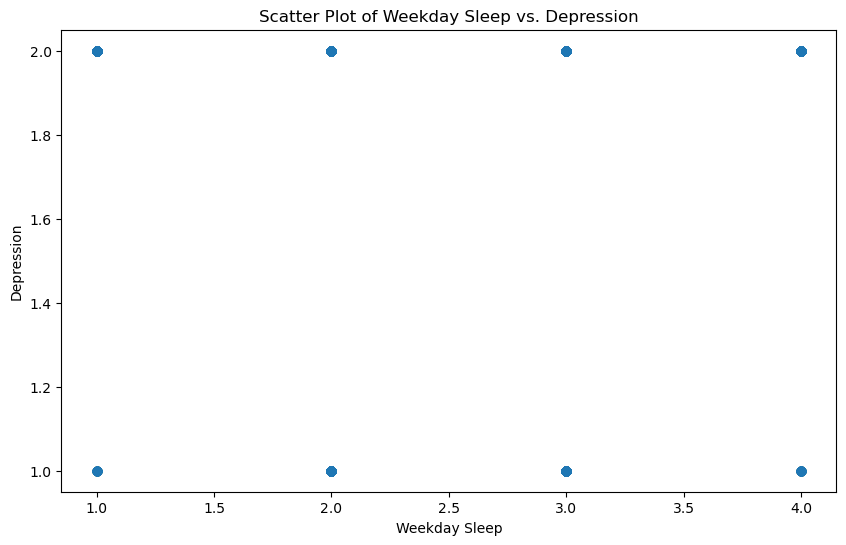

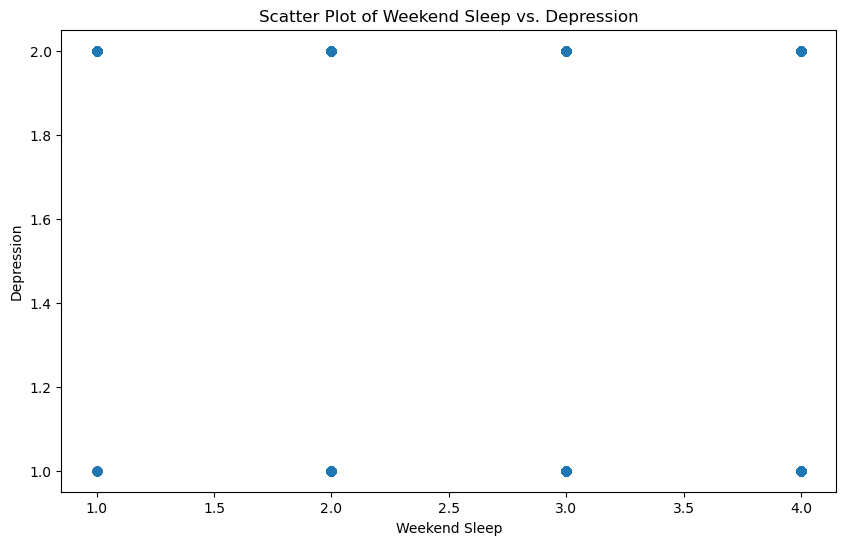

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for wday_sleep and depression
plt.figure(figsize=(10, 6))
plt.scatter(df['wday_sleep'], df['depress'], alpha=0.5)
plt.xlabel('Weekday Sleep')
plt.ylabel('Depression')
plt.title('Scatter Plot of Weekday Sleep vs. Depression')
plt.show()

# Scatter plot for wend_sleep and depression
plt.figure(figsize=(10, 6))
plt.scatter(df['wend_sleep'], df['depress'], alpha=0.5)
plt.xlabel('Weekend Sleep')
plt.ylabel('Depression')
plt.title('Scatter Plot of Weekend Sleep vs. Depression')
plt.show()

In [ ]:
# 두 변수가 선형 관계에  있다는 의미 (한 변수가 증가하면 다른 변수도 일정한 비율로 증가, 감소한다)

C:\Users\shj06\AppData\Local\Temp\ipykernel_27272\2082691512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['wday_sleep'] = df_selected['wday_sleep'].astype('category').cat.codes
C:\Users\shj06\AppData\Local\Temp\ipykernel_27272\2082691512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['wend_sleep'] = df_selected['wend_sleep'].astype('category').cat.codes


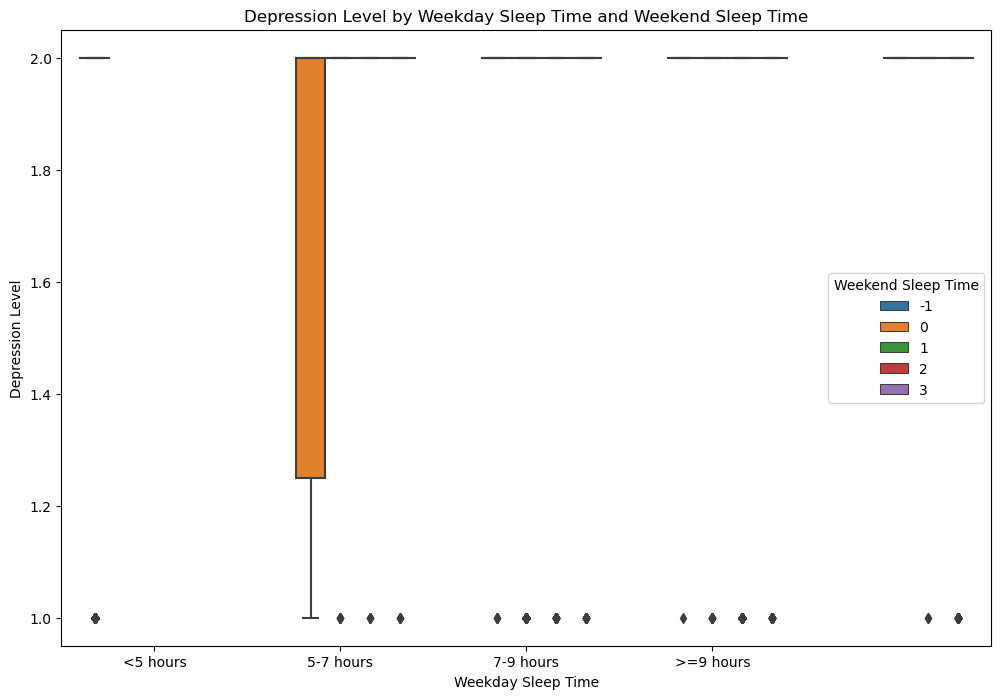

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 df에서 필요한 열만 선택
selected_columns = ['wday_sleep', 'wend_sleep', 'depress', 'suicide']
df_selected = df[selected_columns]

# 수면시간 카테고리를 숫자로 변환하여 시각화에 활용
df_selected['wday_sleep'] = df_selected['wday_sleep'].astype('category').cat.codes
df_selected['wend_sleep'] = df_selected['wend_sleep'].astype('category').cat.codes

# 상자 그림 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected, x='wday_sleep', y='depress', hue='wend_sleep')
plt.xlabel('Weekday Sleep Time')
plt.ylabel('Depression Level')
plt.title('Depression Level by Weekday Sleep Time and Weekend Sleep Time')
plt.legend(title='Weekend Sleep Time')
plt.xticks(ticks=[0, 1, 2, 3], labels=['<5 hours', '5-7 hours', '7-9 hours', '>=9 hours'])
plt.show()

In [ ]:
#최적의 sleep time hours를 확인할수 있었다.

#### 다중 공선성 검정
두개 또는 그 이상의 설명 변수들이 서로 밀접하게 상관되어있는지 확인하기 
> 공선성 검출 과정 
: 설명변수들의 상관계수 행렬 관찰
: 상관계수의 절대 값이 크면 공선성 발생 가능성 높아짐 
: VIF(Variance Inflatino Factor) 계산 
    VIF가 5또는 10을 초과하면 공선성이 존재한다고 경험적으로 판단함.
    
    해당 공선성을 해결하기 위해서는 
    1. 문제가 있는 변수들중에 하나를 제거 한다(별로 영향X)
    2. 변수 선택 방법 사용

In [40]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

# Fit the OLS model
model_sleep = smf.ols('depress ~ wday_sleep + wend_sleep + sex + age_g ', data=df).fit()

# Get the design matrix (X) and dependent variable (y)
y, X = patsy.dmatrices('depress ~ wday_sleep + wend_sleep + sex + age_g ', df, return_type='matrix')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.design_info.column_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF values
print("VIF for each feature:")
print(vif_data)

VIF for each feature:
              feature        VIF
0           Intercept  41.269192
1   wday_sleep[T.2.0]  13.526698
2   wday_sleep[T.3.0]  14.767865
3   wday_sleep[T.4.0]   6.270488
4   wend_sleep[T.2.0]  13.589081
5   wend_sleep[T.3.0]  19.131916
6   wend_sleep[T.4.0]  15.633447
7      age_g[T.65-69]   1.047504
8      age_g[T.70-79]   1.083538
9     age_g[T.80세 이상]   1.062242
10                sex   1.005821
